# Introducción a TensorFlow

In [1]:
import tensorflow as tf

In [2]:
x1 = tf.constant([1,2,3,4,5])
x2 = tf.constant([6,7,8,9,10])

In [3]:
res = tf.multiply(x1,x2)  #Multiplica 2 vectores

In [4]:
print(res)

Tensor("Mul:0", shape=(5,), dtype=int32)


In [5]:
# En este ejemplo multiplica x1 * x2
sess = tf.Session()  # Abrir sesión
print(sess.run(res))  # Ejecuta línea de comandos en TensorFlow
sess.close  # Cierre de sesión

[ 6 14 24 36 50]


<bound method BaseSession.close of <tensorflow.python.client.session.Session object at 0x00000231E91FB908>>

In [6]:
# Otro método de trabajar con sesiones
with tf.Session() as sess:
    output = sess.run(res)
    print(output)

[ 6 14 24 36 50]


# Reconocimiento de señales de tránsito

In [7]:
import tensorflow as tf
import os
import skimage.data as imd
import numpy as np

In [8]:
def load_ml_data(data_directory):
    dirs = [d for d in os.listdir(data_directory)
            if os.path.isdir(os.path.join(data_directory,d))]
    
    labels = []
    images = []
    for d in dirs:
        label_dir = os.path.join(data_directory, d)
        file_names = [os.path.join(label_dir, f)
                     for f in os.listdir(label_dir)
                     if f.endswith(".ppm")]
        
        for f in file_names:
            images.append(imd.imread(f))
            labels.append(int(d))
        
    return images, labels

In [9]:
main_dir = 'G:/BD/GitHub/mlearningcourse/datasets/belgian/'
train_data_dir = os.path.join(main_dir, "Training")
test_data_dir = os.path.join(main_dir, "Testing")

In [10]:
image, labels = load_ml_data(train_data_dir)

In [11]:
import numpy as np

In [12]:
images = np.array(image)

In [13]:
labels = np.array(labels)

In [14]:
images.shape

(4575,)

In [15]:
images.ndim # Columna

1

In [16]:
images.size # Filas

4575

In [17]:
# Imágenes representadas en un array (cada elemento es un pixel (cada 3 números de cada fila es un pixel RGB))
images[0]

array([[[210, 249, 232],
        [204, 249, 208],
        [197, 198, 155],
        ...,
        [ 51,  60,  40],
        [ 54,  64,  44],
        [ 57,  66,  46]],

       [[209, 250, 236],
        [212, 255, 217],
        [200, 196, 156],
        ...,
        [ 49,  57,  38],
        [ 51,  59,  41],
        [ 53,  60,  42]],

       [[203, 246, 236],
        [207, 246, 213],
        [202, 192, 156],
        ...,
        [ 47,  53,  35],
        [ 48,  54,  36],
        [ 48,  55,  37]],

       ...,

       [[  2,  22,  25],
        [ 26,  56,  77],
        [ 71, 140, 159],
        ...,
        [ 84,  77,  50],
        [ 68,  66,  41],
        [ 56,  64,  44]],

       [[  0,  22,  32],
        [ 30,  75, 106],
        [ 87, 176, 198],
        ...,
        [ 86,  80,  52],
        [ 68,  66,  41],
        [ 55,  63,  42]],

       [[  0,  32,  50],
        [ 42, 101, 135],
        [121, 217, 239],
        ...,
        [ 87,  80,  52],
        [ 70,  68,  43],
        [ 58,  66,  46]]

In [18]:
print('Columas =', labels.ndim)
print('Filas =',labels.size)

Columas = 1
Filas = 4575


In [19]:
len(set(labels))  # Para establecer cuantas hay diferentes (usar SET)

62

In [20]:
images.flags  # Parámetros de proceso de carga de imágenes en este array


  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [21]:
images.itemsize  # Tamaño de los elementos (8 bits cada elemento)

8

In [22]:
images.nbytes   # Número total de bytes

36600

In [23]:
# Cantidad de bytes utilizados en memoria para la carga de imágenes
tamanio_por_item = images.nbytes / images.itemsize
tamanio_por_item

4575.0

In [24]:
import matplotlib.pyplot as plt

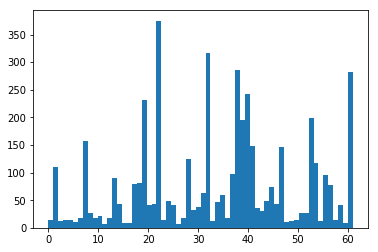

In [25]:
# Histograma de etiquetas (labels  # 62)
plt.hist(labels, len(set(labels)))
plt.show()  # Muestra gráfico sin el array de datos

# Este gráfico muestra la cantidad de imágenes por cada tipo de imagen

### Análisis preliminar de imágenes

In [26]:
import random

In [27]:
# rand_signs = random.sample(range(0,len(labels)), 6)  # Muestra aleatoria simple de 6 señales
# rand_signs

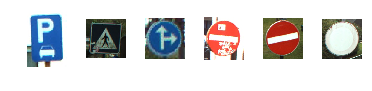

In [28]:
# Primera vista de imágenes aleatorias
rand_signs = random.sample(range(0,len(labels)), 6)  # Muestra aleatoria simple de 6 señales
rand_signs

# Imprime la muestra aleatoria de las imágenes
for i in range(len(rand_signs)):
    plt.subplot(1,6,i+1)  # 1 columna y 6 filas
    plt.axis('off')   #Quita ejes
    plt.imshow(images[rand_signs[i]])
    plt.subplots_adjust(wspace = 0.5) # Las imágenes quedan separadas
plt.show()


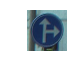

Forma:(83, 81, 3),min:17, max:198


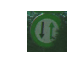

Forma:(91, 87, 3),min:10, max:193


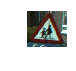

Forma:(80, 87, 3),min:0, max:255


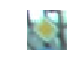

Forma:(27, 27, 3),min:55, max:255


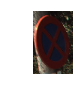

Forma:(194, 121, 3),min:0, max:255


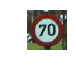

Forma:(68, 68, 3),min:3, max:255


In [29]:
# Segunda vista de imágenes aleatorias
rand_signs = random.sample(range(0,len(labels)), 6)  # Muestra aleatoria simple de 6 señales
rand_signs

# Imprime la muestra aleatoria de las imágenes
for i in range(len(rand_signs)):
    temp_im = images[rand_signs[i]]
    plt.subplot(1,6,i+1)  # 1 columna y 6 filas
    plt.axis('off')   #Quita ejes
    plt.imshow(temp_im)
    plt.subplots_adjust(wspace = 0.5) # Las imágenes quedan separadas
    plt.show()
    print('Forma:{0},min:{1}, max:{2}'.format(temp_im.shape,  # Tamaño de las imágenes en píxeles
                                       temp_im.min(),  # Píxeles con color mínimo (o sea 0)
                                           temp_im.max())) # Píxeles con color máximo (osea 255) blanco

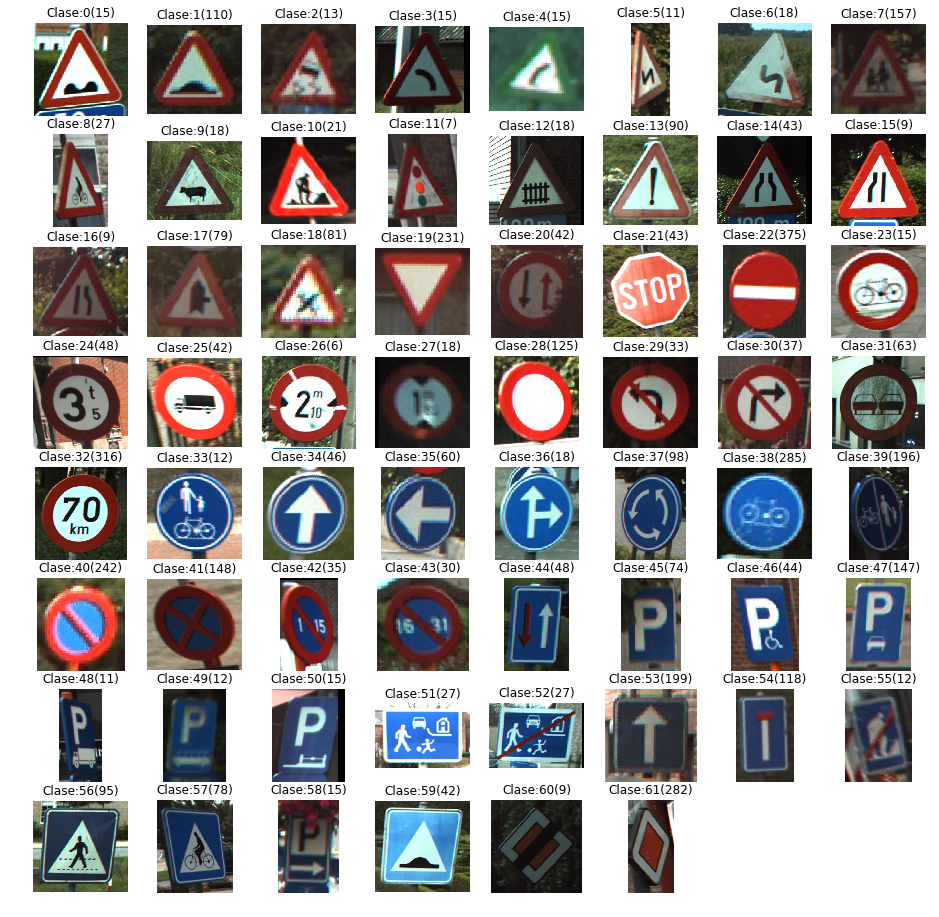

In [30]:
# Representación gráfica de cada imagen
unique_labels= set(labels)
plt.figure(figsize=(16,16))
i = 1
for label in unique_labels:
    temp_im=images[list(labels).index(label)]
    plt.subplot(8,8, i )
    plt.axis('off')
    plt.title('Clase:{0}({1})'.format(label, list(labels).count(label)))
    i += 1
    plt.imshow(temp_im)
plt.show()

# Muestra la cantidad de imágenes en cada clase (ej. clase 2 contiene 13 imágenes)